#Note: This lab was part of my MSc Artificial Intelligence course
# Lab 3. Genetic Algorithms
# Task 3.2 The 8-Queens Problem
## Problem Description:
###Rules of the Problem
A queen can attack other pieces in the same:
- Row
- Column
- Diagonal

The placement must ensure that no two queens share the same row, column, or diagonal.
###Key Challenges
There are 92 possible solutions where all constraints are satisfied, but the total number of ways to arrange 8 queens is huge (approximately 4.4 billion possibilities if no constraints are applied).
The task is to find one (or all) of these valid configurations efficiently.

###For the Genetic Algorithm approach:

####Encoding Scheme:

Represent a solution as an array where each value represents the column position of a queen, and the index represents the row.

Example: [0, 4, 7, 5, 2, 6, 1, 3] means:

Row 0 → Queen in column 0

Row 1 → Queen in column 4, and so on.

####Fitness Function:

Count how many queens are attacking each other.

A valid solution will have a fitness of 0 (no attacks).

####Genetic Operators:
Selection: Pick better solutions (fewer attacks) for reproduction.

Crossover: Combine parts of two valid solutions to create a new one.

Mutation: Randomly swap or modify positions to explore other possibilities.

###Objective
Find a single arrangement (or multiple) where no two queens attack each other.



In [1]:
!pip install deap
import random
import numpy as np
from deap import algorithms, base, creator, tools


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [2]:
NB_QUEENS = 8

def evalNQueens(individual):

    # create 2 list for the falling diagonal (fd) and the raising diagonal (rd)
    fd = np.zeros(2*NB_QUEENS-1)
    rd = np.zeros(2*NB_QUEENS-1)

    # count the number of queens placed on diagonals fd/rd
    for i in range(NB_QUEENS):
      fd[i+individual[i]] += 1
      rd[NB_QUEENS-1-i+individual[i]] += 1

    # sum the number of queens if more than 1 queen on a diagonal
    return np.sum(fd[fd>1]) + np.sum(rd[rd>1]),


In [3]:
# enforce only 1 queen per column by using a list of NB_QUEENS
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# enforce only 1 queen per row by using permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

# register all elements of the GA
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)

In [4]:
# run the GA to get the result
random.seed(64)
pop = toolbox.population(n=300)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=False)
best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness value: %s" %(best, best.fitness.values[0]))

Best: [5, 3, 1, 7, 4, 6, 0, 2]. Fitness value: 0.0


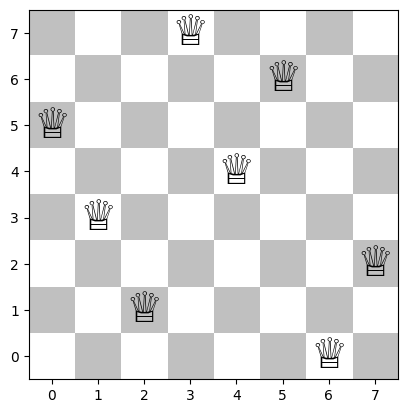

In [5]:
# display the result
import matplotlib.pyplot as plt

chessboard = np.ones((NB_QUEENS, NB_QUEENS))
chessboard[1::2,0::2] = 0.75
chessboard[0::2,1::2] = 0.75
plt.imshow(chessboard, cmap='gray', origin='lower', vmin=0, vmax=1)
for x in range(NB_QUEENS):
    plt.text(x, best[x], '♕', fontsize=30, ha='center', va='center')

#Results for the 8-Queens Problem

##Best Solution:
The genetic algorithm successfully found a valid solution: [5, 3, 1, 7, 4, 6, 0, 2].

This represents the positions of the queens:

Row 0 → Column 5

Row 1 → Column 3

Row 2 → Column 1, and so on.

##Fitness Value:
0, meaning there are no diagonal conflicts, and the solution satisfies all constraints.

##Visualisation:
The visualisation of the solution shows the chessboard with queens placed in positions where they do not attack each other.

The alternating grey and white squares highlight the valid arrangement.

##Discussion:
The genetic algorithm effectively solved the problem by finding a solution in 50 generations with a population size of 300.

Using Scheme 3 (permutation-based encoding) ensured that row and column constraints were met, simplifying the problem to only diagonal conflicts.

The combination of tournament selection, crossover, and mutation allowed the algorithm to balance exploration and exploitation, avoiding local optima.

This result demonstrates the effectiveness of the genetic algorithm in solving constraint satisfaction problems like the 8-Queens Problem efficiently.

***

#Steps to Modify The Q-Queens Problem for the 12-Queens Problem
##Encoding Scheme:

Use Scheme 3: A permutation of numbers from 0 to 11, where each number represents the row position of a queen in its respective column. This automatically enforces row and column constraints.

##Fitness Function:
The fitness function should count the number of diagonal conflicts between queens:
Each queen is checked against the others to see if they share the same diagonal.
A valid solution will have 0 conflicts.

##Genetic Operators:

Selection: Tournament selection.

Crossover: Permutation-based crossover, e.g., Order Crossover (OX).

Mutation: Swap mutation, which swaps the positions of two queens in the permutation.

##Adjust Parameters:
Increase the population size to handle the larger problem size.
Use more generations for better exploration of the solution space.

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min
0  	300   	3  
1  	267   	2  
2  	250   	1  
3  	245   	1  
4  	247   	1  
5  	254   	1  
6  	246   	2  
7  	254   	1  
8  	263   	1  
9  	248   	1  
10 	262   	2  
11 	251   	2  
12 	246   	2  
13 	255   	2  
14 	260   	1  
15 	239   	2  
16 	245   	2  
17 	242   	2  
18 	251   	2  
19 	250   	2  
20 	262   	0  
21 	244   	0  
22 	254   	0  
23 	249   	0  
24 	252   	0  
25 	253   	1  
26 	258   	1  
27 	253   	1  
28 	244   	1  
29 	266   	0  
30 	257   	1  
31 	252   	1  
32 	255   	1  
33 	252   	1  
34 	241   	1  
35 	246   	1  
36 	254   	1  
37 	243   	1  
38 	268   	0  
39 	254   	1  
40 	260   	1  
41 	261   	2  
42 	273   	2  
43 	251   	2  
44 	258   	2  
45 	263   	2  
46 	247   	2  
47 	257   	0  
48 	259   	1  
49 	255   	1  
50 	242   	2  
51 	252   	2  
52 	265   	1  
53 	247   	1  
54 	264   	1  
55 	237   	1  
56 	258   	1  
57 	260   	1  
58 	247   	2  
59 	271   	1  
60 	245   	1  
61 	253   	1  
62 	250   	2  
63 	254   	1  
64 	255   	2  
65 	250   

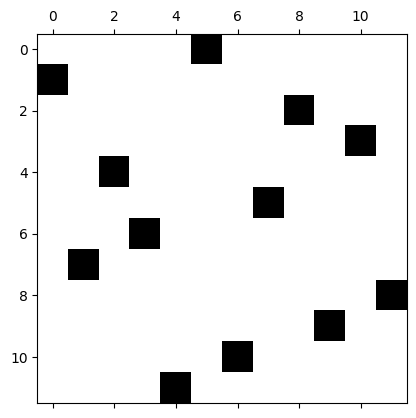

In [6]:
import random
from deap import base, creator, tools, algorithms
import numpy as np

# Number of queens
NB_QUEENS = 12

# Fitness function to calculate diagonal conflicts
def evalNQueens(individual):
    diagonal_conflicts = 0
    for i in range(NB_QUEENS):
        for j in range(i + 1, NB_QUEENS):
            if abs(individual[i] - individual[j]) == abs(i - j):  # Check diagonals
                diagonal_conflicts += 1
    return diagonal_conflicts,

# Define problem as minimizing conflicts
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(NB_QUEENS), NB_QUEENS)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalNQueens)

# Genetic Algorithm Parameters
population_size = 300
crossover_probability = 0.8
mutation_probability = 0.2
generations = 100

# Run the Genetic Algorithm
random.seed(42)
population = toolbox.population(n=population_size)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)

algorithms.eaSimple(population, toolbox, cxpb=crossover_probability,
                    mutpb=mutation_probability, ngen=generations, stats=stats, verbose=True)

# Get the best solution
best_solution = tools.selBest(population, 1)[0]
print("Best Solution:", best_solution)
print("Fitness (Conflicts):", evalNQueens(best_solution)[0])

# Visualize the board
import matplotlib.pyplot as plt

def visualize_board(solution):
    board = np.zeros((NB_QUEENS, NB_QUEENS))
    for col, row in enumerate(solution):
        board[row][col] = 1

    fig, ax = plt.subplots()
    ax.matshow(board, cmap="binary")
    for i in range(NB_QUEENS):
        ax.text(i, solution[i], '♛', va='center', ha='center', fontsize=16)
    plt.show()

visualize_board(best_solution)


# Discussions

##Why Scheme 3 is Efficient:
Using Scheme 3 (a permutation-based encoding) automatically solves the row and column constraints, leaving only the diagonal conflicts for the algorithm to fix. This makes the genetic algorithm much simpler and faster to work with, especially as the number of queens increases (e.g., from 8 to 12).

However, as the problem gets bigger, more population and generations might be needed for the algorithm to explore solutions effectively.

##Challenges with Fitness Evaluation:
The fitness function, which counts diagonal conflicts, works well but can become slower as the board size increases because it needs to compare all pairs of queens. This could be improved by using better algorithms or parallel processing.

Additionally, the algorithm might get stuck in local optima (good but not perfect solutions), so having the right mix of exploration (mutation) and refinement (crossover) is important.

##Real-world Importance:
The Queens Problem is a great example of solving constraints using genetic algorithms. It shows how these algorithms can be used not just for puzzles but for practical problems like scheduling and resource allocation.

It also highlights the flexibility of genetic algorithms in solving complex problems where traditional methods might struggle.
